##Librerias

In [1]:
import pandas as pd # Libreria para lectura de los datos

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from statsmodels.tsa.arima_model import ARIMA

In [4]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

In [5]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

##Informacion de los Datos

**Leer conjunto de datos**
El dataset contiene información sobre el precio de la criptomoneda Monero,los datos son una serie de tiempo recopilada diariamente.
*   Open: precio de apertura
*   High: máximo precio tranzado 
*   Low: mínimo precio tranzado
*   Close: precio de cierre 
*   Volume: Dinero tranzado
*   Market Cap: Capital de la criptomoneda en dolares.[texto del vínculo](https://)

In [7]:
Monero = pd.read_csv("/content/coin_Monero.csv",parse_dates=['Date'])
Monero = Monero.set_index('Date')
Monero.sort_index(inplace=True)

In [8]:
Monero.head()#Vemos los valores que tenemos en cada columna

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2014-05-22 23:59:59,1,Monero,XMR,2.18888,1.35909,1.58940,2.09558,132918.0,1.855608e+06
2014-05-23 23:59:59,2,Monero,XMR,3.43437,2.05104,2.05104,2.96302,266852.0,2.692180e+06
2014-05-24 23:59:59,3,Monero,XMR,4.01424,2.61778,2.92039,3.70245,248028.0,3.456658e+06
2014-05-25 23:59:59,4,Monero,XMR,4.04303,2.80330,4.04303,3.13856,283545.0,2.993339e+06
2014-05-26 23:59:59,5,Monero,XMR,3.76235,2.31202,3.21897,3.02186,220148.0,2.946133e+06


In [9]:
Monero.describe() #Analizamos los principales estadisticos

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2.602000e+03,2.602000e+03
mean,1301.500000,77.357637,70.481496,74.069198,74.134773,1.637467e+08,1.236534e+09
std,751.277024,96.070702,85.520895,91.188680,91.180556,9.193947e+08,1.534699e+09
min,1.000000,0.251757,0.212967,0.220121,0.223522,7.899570e+03,1.279606e+06
25%,651.250000,1.706342,1.472560,1.575765,1.588685,1.735218e+05,9.731418e+06
50%,1301.500000,52.737242,49.691152,51.254060,51.337759,2.466770e+07,8.558357e+08
75%,1951.750000,105.886750,99.589450,103.467749,102.915250,1.034612e+08,1.708818e+09
max,2602.000000,517.620245,453.390991,483.709977,483.583612,2.895912e+10,8.658968e+09


In [10]:
Monero.info() # Checamos que el tipo de dato guardado en cada variable

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2602 entries, 2014-05-22 23:59:59 to 2021-07-06 23:59:59
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2602 non-null   int64  
 1   Name       2602 non-null   object 
 2   Symbol     2602 non-null   object 
 3   High       2602 non-null   float64
 4   Low        2602 non-null   float64
 5   Open       2602 non-null   float64
 6   Close      2602 non-null   float64
 7   Volume     2602 non-null   float64
 8   Marketcap  2602 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 203.3+ KB


In [11]:
Monero.tail()# Analisis de la las colas

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2021-07-02 23:59:59,2598,Monero,XMR,211.666077,199.608531,206.252403,211.345143,1.519434e+08,3.792466e+09
2021-07-03 23:59:59,2599,Monero,XMR,216.327967,207.042192,211.458163,214.752778,1.364141e+08,3.853768e+09
2021-07-04 23:59:59,2600,Monero,XMR,224.909012,213.023069,214.839958,219.841418,1.697858e+08,3.945232e+09
2021-07-05 23:59:59,2601,Monero,XMR,220.354191,206.502607,219.961957,214.464993,1.709852e+08,3.848898e+09
2021-07-06 23:59:59,2602,Monero,XMR,222.137136,212.296827,214.470724,222.137136,1.678620e+08,3.986738e+09


In [12]:
Monero['High'].head() # Primeros elementos del dataset

Date
2014-05-22 23:59:59    2.18888
2014-05-23 23:59:59    3.43437
2014-05-24 23:59:59    4.01424
2014-05-25 23:59:59    4.04303
2014-05-26 23:59:59    3.76235
Name: High, dtype: float64

Graficamos la serie de tiempo con la que vamos a trabajar, al tratarse de una criptomoneda podemos ver que tiene un compartamiento que demuestra que existe gran volatilidad

Text(0.5, 1.0, 'Monero')

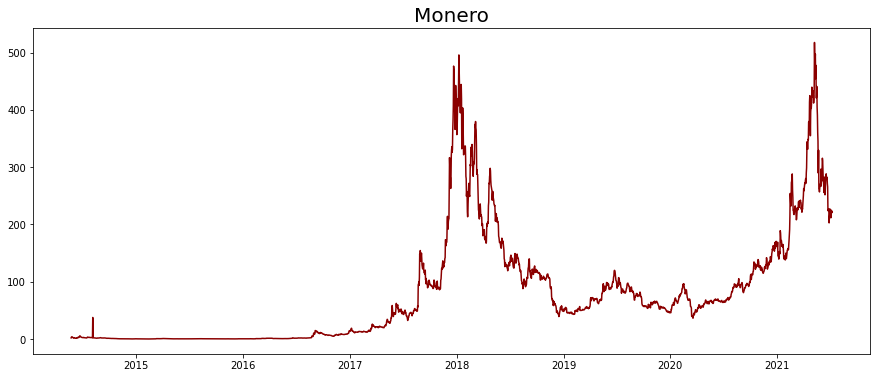

In [13]:
plt.figure(figsize = (15,6))
plt.plot(Monero["High"], color = "darkred")
plt.title("Monero",fontsize = 20)

##Modelo

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


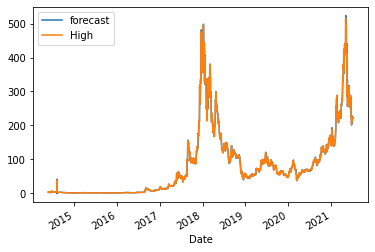

In [14]:
mod = ARIMA(Monero['High'], order=(1,1,1))
res = mod.fit() 
fig = res.plot_predict(dynamic = False)
fig.show()

Ejecutamos la prueba de Dickey-Fuller para poder analizar la correlacion del modelo conforme a los parametros obtenidos del p-value y el ADF.

In [15]:
result = adfuller(Monero["High"].dropna())
print("ADF Staticts: %f" % result[0])

ADF Staticts: -2.065260


In [16]:
print("P-Value: %f" % result[1])

P-Value: 0.258711


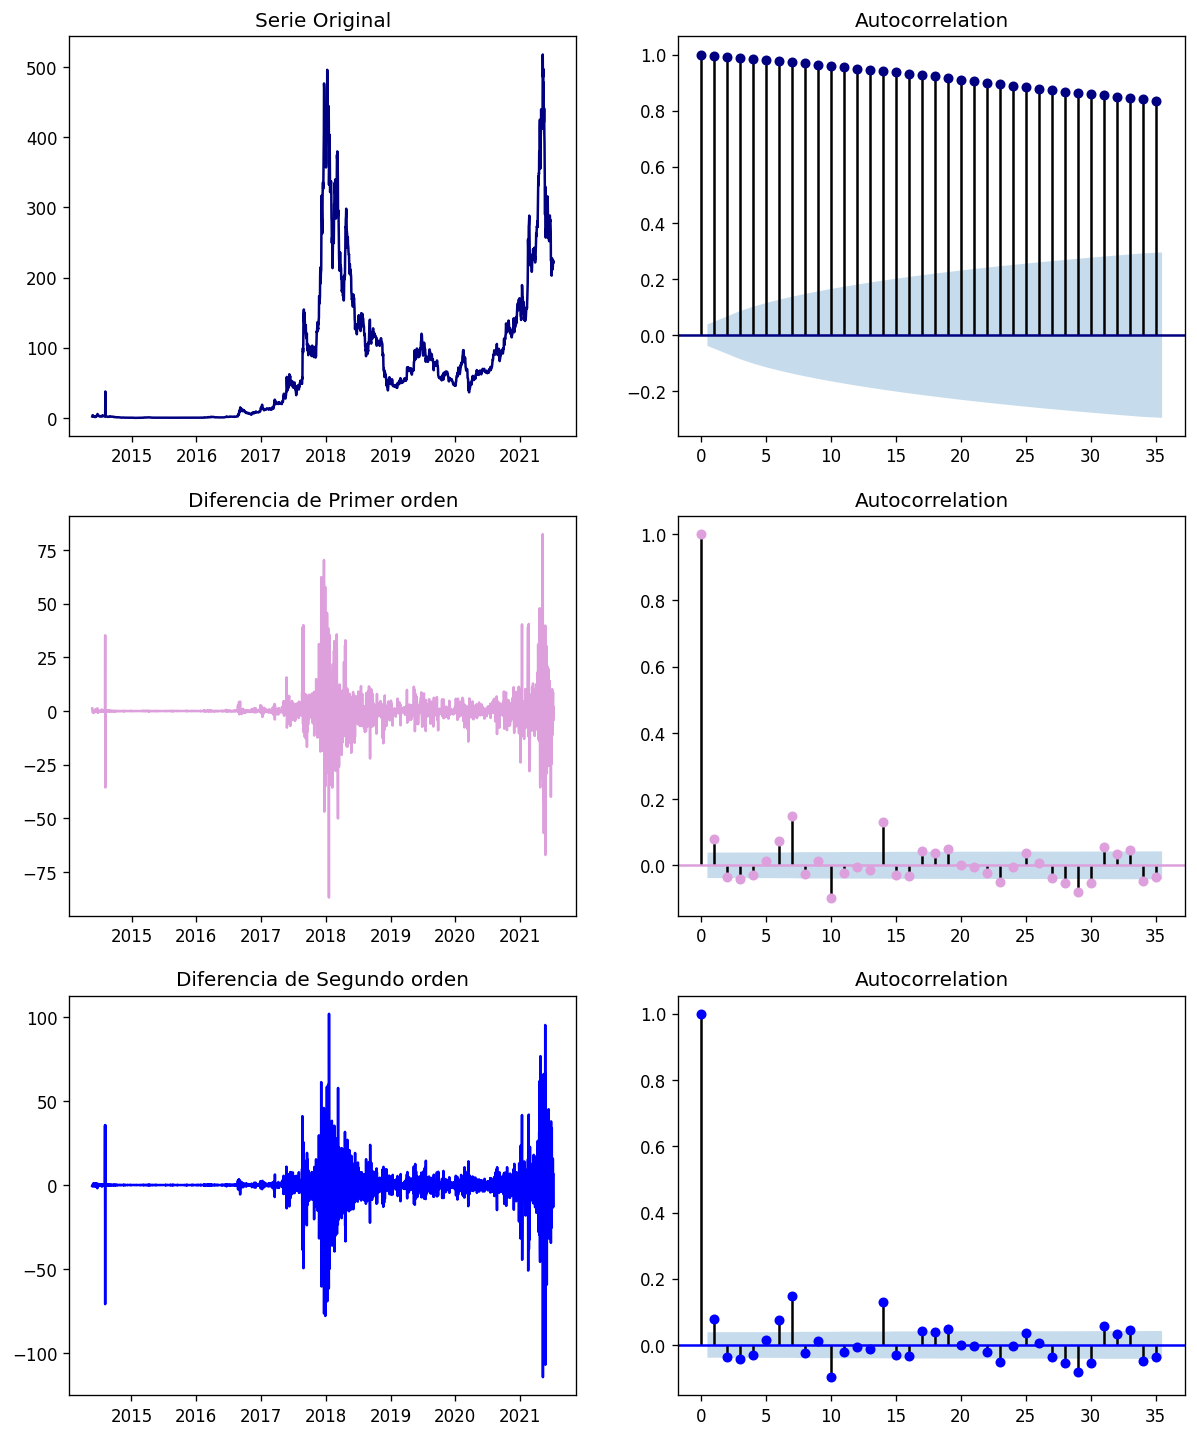

In [46]:
plt.rcParams.update({"figure.figsize":(12,15), "figure.dpi":120})
fig, axes = plt.subplots(3,2, sharex = False)
axes[0,0].plot(Monero["High"], color = "navy"); axes[0, 0].set_title("Serie Original")
plot_acf(Monero["High"], ax = axes[0,1], color = "navy")

axes[1,0].plot(Monero["High"].diff(), color = "plum"); axes[1,0].set_title("Diferencia de Primer orden")
plot_acf(Monero["High"].diff().dropna(), ax = axes[1,1],color = "plum")

axes[2,0].plot(Monero["High"].diff().diff(), color = "blue"); axes[2,0].set_title("Diferencia de Segundo orden")
plot_acf(Monero["High"].diff().dropna(), ax = axes[2,1],color = "blue")

plt.show()


Se ejecuta la primera diferenciacion en este punto y analizando el p value se puede notar que se alcanzo la estacionalidad

In [18]:
result = adfuller(Monero["High"].diff().dropna())
print("ADF Staticts: %f" % result[0])

ADF Staticts: -10.182978


Se determina el siguiente valor $d = 1$ debido a que en la primera diferencial se alcanzo la estacionalidad y se cumplio el criterio de p value menor al 5%

In [19]:
print("P-Value: %f" % result[1])

P-Value: 0.000000


Al ejecutar la segunda diferenciacion podemos confirmar la estacionalidad de la serie de tiempo dado que nuevamente el p value es 0

In [20]:
result = adfuller(Monero["High"].diff().diff().dropna())
print("ADF Staticts: %f" % result[0])

ADF Staticts: -16.882742


In [21]:
print("P-Value: %f" % result[1])

P-Value: 0.000000


A continuacion se realizan las siguientes ejecuciones para encontrar el numero de terminos AR

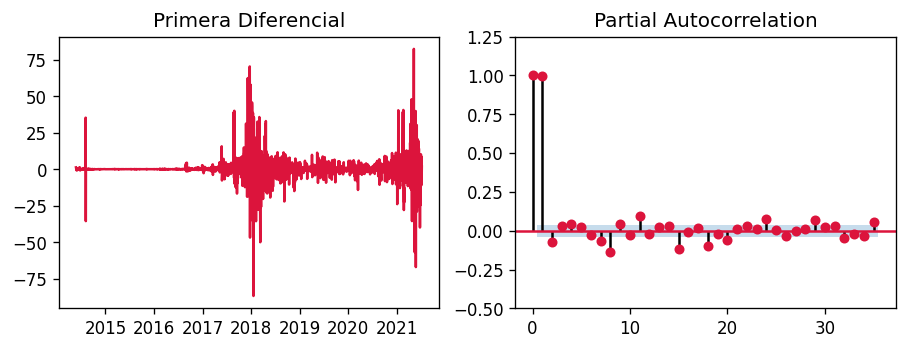

In [43]:
plt.rcParams.update({"figure.figsize" : (9,3), "figure.dpi":120})
fig, axes = plt.subplots(1,2, sharex = False)
axes[0].plot(Monero["High"].diff(), color = "crimson");axes[0].set_title("Primera Diferencial")
axes[1].set(ylim=(-0.5,1.25))
plot_pacf(Monero["High"].dropna(), ax = axes[1], color = "crimson")
plt.show() 

Se puede observar que el primer restarso PACF es bastante significativo debido a que se iobserva muy por encima de los demas, en general por lo menos los primeros 5 retardos cruzan el limite de significancia.
Sin embargo tomare el valor como $p = 1$ a manera su suposicion

In [23]:
import statsmodels.api as sm

In [24]:
sm.stats.acorr_ljungbox(res.resid, lags =[10],return_df=True)

,lb_stat,lb_pvalue
10,105.482868,4.331479e-18


El ruido blanco es muy bajo

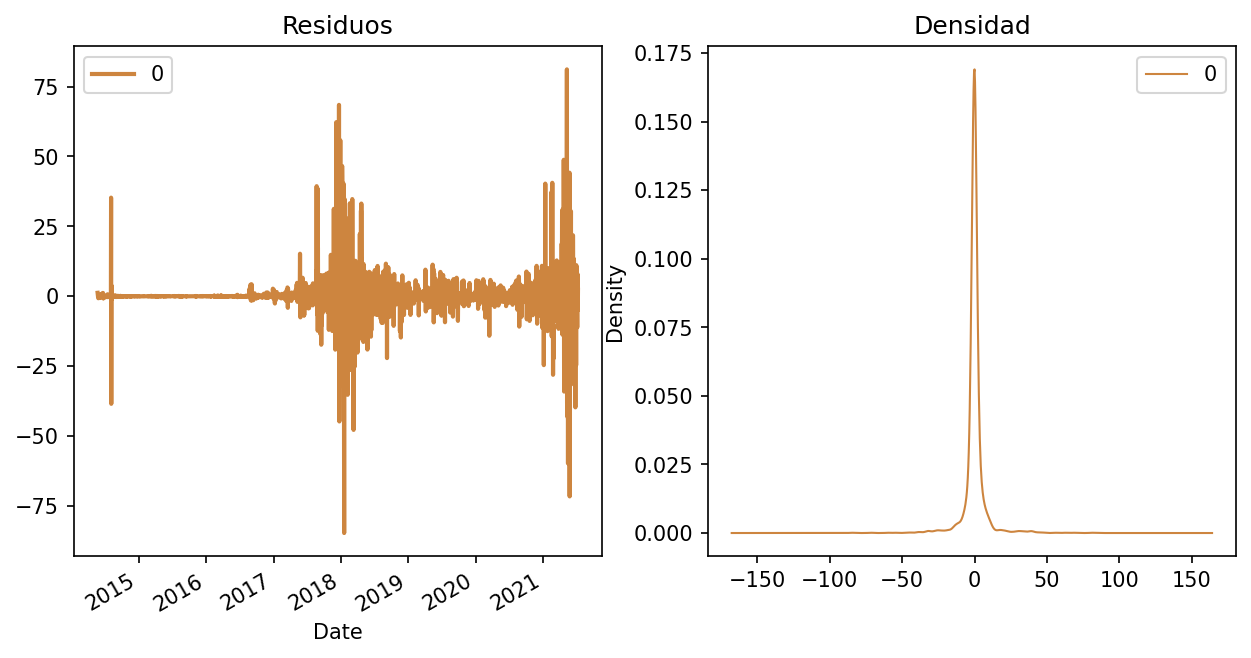

In [25]:
plt.rcParams.update({"figure.figsize" : (10,5), "figure.dpi":150})

residuals = pd.DataFrame(res.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title = "Residuos", ax = ax[0], color = "peru", lw=2)
residuals.plot(kind = "kde", title = "Densidad", ax = ax[1],color = "peru",lw = 1)
plt.show()

Analizamos un trozo de la serie de tiempo para ver a mas detalle el movimiento entre los valores pronosticados y los valores reales

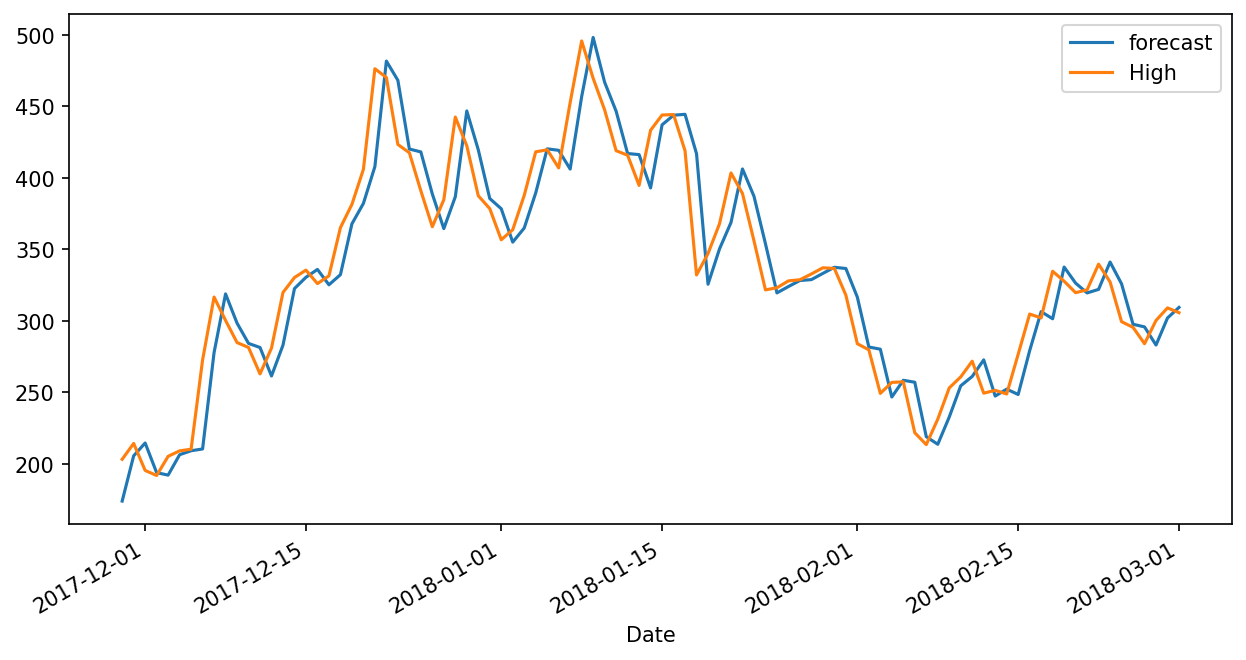

In [26]:
fig = res.plot_predict(start='2017-11-28', end='2018-02-28',dynamic = False)
fig.show()

In [27]:
print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.High   No. Observations:                 2601
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8967.523
Method:                       css-mle   S.D. of innovations              7.605
Date:                Mon, 05 Dec 2022   AIC                          17943.046
Time:                        03:43:51   BIC                          17966.500
Sample:                             1   HQIC                         17951.544
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0847      0.159      0.532      0.595      -0.227       0.397
ar.L1.D.High    -0.2108      0.195     -1.081      0.280      -0.593       0.171
ma.L1.D.High     0.2932      0.191      1.53

El codigo anterior nos relata a grandes razgos la construccion de los coefcientes de los terminos.

Una observacion importante que debemos hacer y comentar es que MA2 es cercano a cero, por lo cual se indica cumplimiento de valores optimos.